Decison Tree Model using cross validation
Target variables is Severity ( non- severe == 0 and severe == 1) 
Target created from 'grav'

data for trainning from 2005 to 2018
test from 2019 to 2021

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Randon Forest Classifier 

In [2]:
#new data cleaned file to load
df = pd.read_csv("./data/230921_basic_table_for_analysis_cleaned.csv", index_col=0, low_memory=False)

/Users/johannastarkl/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_M = df[(df['metropolitan'] == 1)]
df_M['metropolitan'].describe()

count    2421738.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: metropolitan, dtype: float64

In [4]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421738 entries, 201900000001 to 201800055766
Data columns (total 48 columns):
 #   Column        Dtype  
---  ------        -----  
 0   num_veh       object 
 1   place         float64
 2   catu          int64  
 3   grav          int64  
 4   sexe          int64  
 5   an_nais       int64  
 6   trajet        float64
 7   locp          float64
 8   actp          object 
 9   etatp         float64
 10  an            int64  
 11  mois          int64  
 12  jour          int64  
 13  hrmn          object 
 14  lum           int64  
 15  agg           int64  
 16  int           int64  
 17  atm           float64
 18  col           float64
 19  adr           object 
 20  lat           float64
 21  long          float64
 22  dep           int64  
 23  metropolitan  float64
 24  catr          float64
 25  circ          float64
 26  nbv           float64
 27  vosp          float64
 28  prof          float64
 29  plan          float64
 30  su

In [5]:
# Count the number of data points with the value -1 in the 'grav' variable
unknown_count = (df_M['grav'] == -1).sum()

# Print the count
print(f"Number of data points with the value -1 in the 'grav' variable: {unknown_count}")

Number of data points with the value -1 in the 'grav' variable: 54


In [6]:
#removing the values of unknow from the data
df_M = df_M[df_M['grav'] != -1]

In [7]:
import numpy as np
# create target variable
# create a new variable for the severity ['Grav'] of accidents ( Sereve, non-severe) as a possible target variable
#### zero = non severe and one equal to severe
df_M['Severe'] = np.where(df_M['grav'].isin([1, 2]), 0, 1)

In [8]:
severe_accidents_catr_1 = df_M[df_M['catr'] == 1]['grav'].value_counts().get(1, 0)
print("Number of severe accidents in category 1 of 'catr':", severe_accidents_catr_1)

Number of severe accidents in category 1 of 'catr': 100511


In [9]:
# cleanning variables that might not be used in the model
df_M['date']= pd.to_datetime(df_M.date,format='%Y-%m-%d')
df_M['year'] = df_M['date'].dt.year.astype(int)



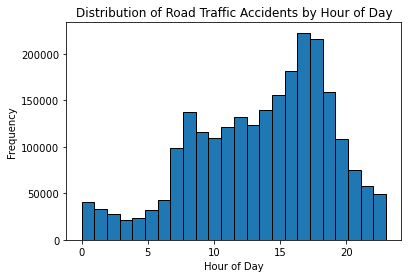

In [10]:
# Convert the 'datetime' column to a datetime data type
from matplotlib import pyplot as plt
df_M['datetime'] = pd.to_datetime(df_M['datetime'])

# Extract the hour of the day from the 'datetime' column
df_M['hour_of_day'] = df_M['datetime'].dt.hour

# Plot the distribution of road traffic accidents by the hour of the day
df_M['hour_of_day'].plot(kind='hist', bins=24, edgecolor='k')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Road Traffic Accidents by Hour of Day')
plt.show()

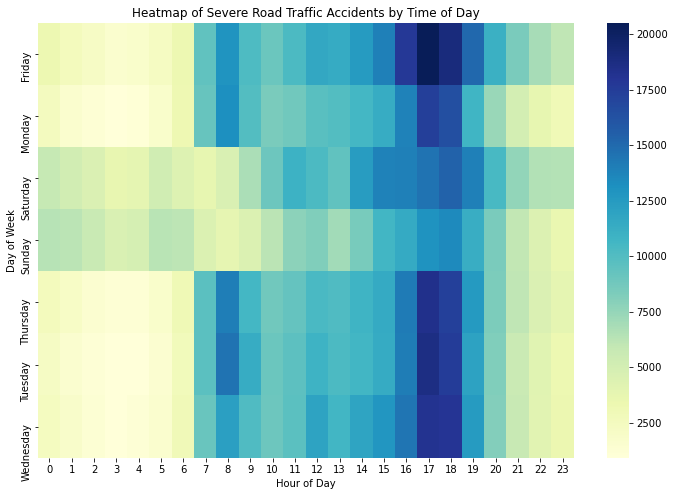

In [11]:
# Convert the 'datetime' column to a datetime data type
df_M['datetime'] = pd.to_datetime(df_M['datetime'])

# Extract the day of the week and hour of the day
df_M['day_of_week'] = df_M['datetime'].dt.day_name()
df_M['hour_of_day'] = df_M['datetime'].dt.hour

#Filter the DataFrame to include only severe accidents
severe_accidents = df_M[df_M['Severe'] == 1]

# Create a pivot table
pivot_table = severe_accidents.pivot_table(values='Severe', index='day_of_week', columns='hour_of_day', aggfunc='count')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='g', cbar=True)
plt.title('Heatmap of Severe Road Traffic Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()



In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_M['actp'] = le.fit_transform(df_M['actp'].astype(str))
df_M['hrmn'] = le.fit_transform(df_M['hrmn'].astype(str))
df_M['day_of_week'] = le.fit_transform(df_M['day_of_week'].astype(str))

In [13]:
#cleanning variables that might not be used in the model
# grav removed because is similat to target 
df_dt = df_M.drop(['num_veh','adr','date','holiday','lat', 'long','datetime','grav','fatal'], axis=1)

In [14]:
#split the data for modeling
# 2005 to 2019 for trainning  and 2020 to 2021 to test

# Filter data for the training period (2005-2018)
train_data = df_dt[(df_dt['an'] >= 2005) & (df_dt['an'] <= 2018)]

# Filter data for the testing period (2019-2021)
test_data = df_dt[(df_dt['an'] >= 2019) & (df_dt['an'] <= 2021)]
 #Separate features and target variable9
X_train = train_data.drop('Severe', axis=1)  # Features for training
y_train = train_data['Severe']  # Target variable for training

# Separate features and target variable
X_test = test_data.drop('Severe', axis=1)  # Features for training
y_test = test_data['Severe']  # Target variable for training


In [15]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 43 columns):
 #   Column        Dtype  
---  ------        -----  
 0   place         float64
 1   catu          int64  
 2   sexe          int64  
 3   an_nais       int64  
 4   trajet        float64
 5   locp          float64
 6   actp          int64  
 7   etatp         float64
 8   an            int64  
 9   mois          int64  
 10  jour          int64  
 11  hrmn          int64  
 12  lum           int64  
 13  agg           int64  
 14  int           int64  
 15  atm           float64
 16  col           float64
 17  dep           int64  
 18  metropolitan  float64
 19  catr          float64
 20  circ          float64
 21  nbv           float64
 22  vosp          float64
 23  prof          float64
 24  plan          float64
 25  surf          float64
 26  infra         float64
 27  situ          float64
 28  senc          float64
 29  catv          int64  
 30  oc

In [16]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Tuning the parameters to find the best decision tree model - start params chosen randomly
model = DecisionTreeClassifier(criterion = 'gini', random_state=50)

param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6], 
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [2, 3, 4]}

#'ccp_alpha': [0.1, 0.01]

cv_dt = GridSearchCV(model, param_grid=param_dist, n_jobs=-1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
# Training with the best parameters

tree = DecisionTreeClassifier(criterion='gini', random_state = 50, max_depth=6, min_samples_leaf=1, min_samples_split=2)
tree.fit(X_train, y_train)
y_pred_gini  = tree.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred_gini))


Accuracy Score:  0.7407520363214727


In [29]:
pd.crosstab(y_test, y_pred_gini, rownames=['Reality'], colnames=['Prediction'])



Prediction,0,1
Reality,,
0,109418,44820
1,45285,148040


In [19]:
# classification_report

print('Classification Report')
print(classification_report(y_test, y_pred_gini))



Classification Report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71    154238
           1       0.77      0.77      0.77    193325

    accuracy                           0.74    347563
   macro avg       0.74      0.74      0.74    347563
weighted avg       0.74      0.74      0.74    347563



In [20]:
#Training set accuracy

y_pred_train_gini = tree.predict(X_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7655


In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.7655
Test set score: 0.7408


Here, the training-set accuracy score is 0.7655 while the test-set accuracy to be 0.7408. These two values are quite comparable. So, there is no sign of overfitting.

In [30]:
from sklearn import metrics
#  confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred_gini)  #y_test_preds

# Create a DataFrame from the confusion matrix
class_names = df_dt.Severe.values
dataframe = pd.DataFrame(matrix, index=['non-fatal', 'fatal'], 
                         columns=['non-fatal', 'fatal'])

# Display the confusion matrix as text
print("Confusion Matrix:")
print(dataframe)

Confusion Matrix:
           non-fatal   fatal
non-fatal     109418   44820
fatal          45285  148040


In [31]:
total_samples = matrix.sum()

# Calculate the percentages
percentages = (matrix / total_samples) * 100

# Create a DataFrame from the percentages
class_names = df_dt.Severe.values
dataframe = pd.DataFrame(percentages, index=['non-fatal', 'fatal'], columns=['non-fatal', 'fatal'])

# Display the confusion matrix as percentages
print("Confusion Matrix (Percentages):")
print(dataframe)

Confusion Matrix (Percentages):
           non-fatal      fatal
non-fatal  31.481487  12.895504
fatal      13.029293  42.593717


In [35]:
# etract thh values from DataFrame

true_negative = dataframe.loc['non-fatal', 'non-fatal']
false_positive = dataframe.loc['non-fatal', 'fatal']
false_negative = dataframe.loc['fatal', 'non-fatal']
true_positive = dataframe.loc['fatal', 'fatal']

# Print the values
print("True Negatives: the model correctly predicted", round(true_negative,2), " % as non-fatal")
print("False Positives: the model incorrectly predicted", round(false_positive,2), " %  as *fatal")
print("False Negatives:the model incorrectly predicted", round(false_negative,2)," %  as *non-fatal")
print("True Positives:the model correctly predicted", round(true_positive,2)," %  as fatal")



True Negatives: the model correctly predicted 31.48  % as non-fatal
False Positives: the model incorrectly predicted 12.9  %  as *fatal
False Negatives:the model incorrectly predicted 13.03  %  as *non-fatal
True Positives:the model correctly predicted 42.59  %  as fatal


Length of feature_names: 42
Length of importances: 42


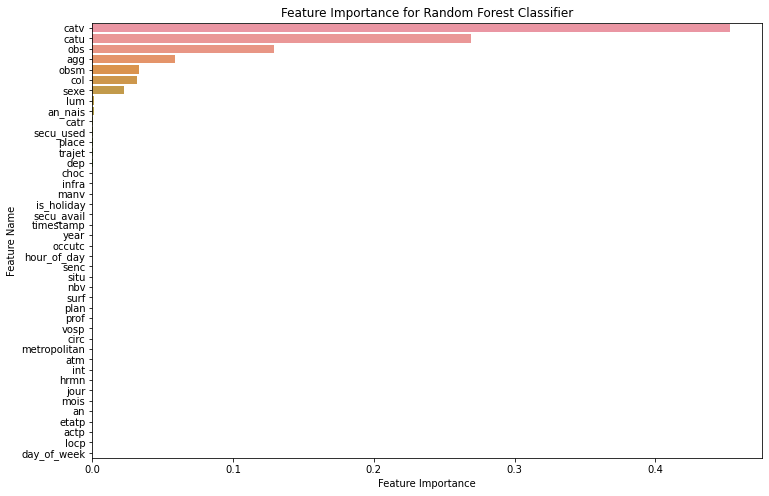

In [37]:
# estimate the feature impotance for thi model
import numpy as np

# Access feature importances from the trained model
importances = tree.feature_importances_

feature_names = df_dt.drop(columns=['Severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()



